# PA005: High Value Customer Identification (Insiders)

## 0.0. Planejamento da Solução

### Input - Entrada

1. Problema de Negócio
    - Seecionar os clientes mais valiosos para integrar um programa de fidelização


2. Conjunto de Dados
    - Vendas de um e-commerce onine, durante o período de um ano

### Output - Saída

1. A indicação das pessoas que farão parte do programa de Insiders
    - Lista: client_id | is_insider
             102030    |   yes/1
             203040    |   no/2
             
2. Relatório com as respostas das perguntas de negócio

- Quem são as pessoas elegíveis para participar do programa de Insiders ?
- Quantos clientes farão parte do grupo?
- Quais as principais características desses clientes ?
- Qual a porcentagem de contribuição do faturamento, vinda do Insiders ?
- Qual a expectativa de faturamento desse grupo para os próximos meses ?
- Quais as condições para uma pessoa ser elegível ao Insiders ?
- Quais as condições para uma pessoa ser removida do Insiders ?
- Qual a garantia que o programa Insiders é melhor que o restante da base ?
- Quais ações o time de marketing pode realizar para aumentar o faturamento?

### Tasks - Tarefas

1. Quem são as pessoas elegíveis para participar do programa de Insiders ?
    - O que é ser elegível? O que são clientes de maior valor?
    - Faturamento:
        - Alto ticket médio
        - Alto LTV
        - Baixa recência
        - Alto basket size
        - Baixa probabilidade de churn
        - Alta Previsão de LTV
        - Alta probabilidade de compra

    - Custo:
        - Baixa taxa de devolução
        
    - Experiência de compra:
        - Média alta das avaliações
        

2. Quantos clientes farão parte do grupo?
    - Número total de clientes 
        - Calcula a porcentagem do grupo insiders
        
        
3. Quais as principais características desses clientes ?
    - Escrever características do cliente:
        - Idade
        - Localização
        
    - Escrever caraterísitacas do consumo:
        - Atributos da Clusterização
        
        
4. Qual a porcentagem de contribuição do faturamento, vinda do Insiders ?
    - Faturamento total do ano
    - Faturameto do grupo Insiders
    
    
5. Qual a expectativa de faturamento desse grupo para os próximos meses ?
    - LTV do grupo Insiders
    - Análise de Cohort
    
    
6. Quais as condições para uma pessoa ser elegível ao Insiders ?
    - Definir a periodicidade
    - A pessoa precisa ser similar ou parecido com uma pessoa/grupo
    
    
7. Quais as condições para uma pessoa ser removida do Insiders ?
    - Definir a periodicidade
    - A pessoa precisa ser diferente com uma pessoa/grupo
    
    
8. Qual a garantia que o programa Insiders é melhor que o restante da base ?
    - Teste A/B
    - Teste A/B Bayesino
    - Teste de hipóteses
    
    
9. Quais ações o time de marketing pode realizar para aumentar o faturamento?
    - Desconto
    - Preferência de compra
    - Frete
    - Visita a empresa

# Descrição o Ciclo

- Limpeza básica nos dados
- Criação de apenas 3 features com base no RMF
- Inspeção visual do Cluster
- Cluster Profile

# <font color = 'green'> Imports </f>

In [92]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from IPython.display import HTML
from sklearn import cluster as c
from sklearn import metrics as m
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

from plotly import express as px

## <font color = 'green'> Helper Functions </f>

## <font color = 'green'> Load Dataset </f>

In [93]:
# load data
df_raw = pd.read_csv('data/Ecommerce.csv',encoding='unicode_escape')

# Remove extra columns
df_raw = df_raw.drop(columns=['Unnamed: 8'],axis=1)

In [94]:
df_raw.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

# <font color = 'green'> Data Description </f>

In [54]:
df1 = df_raw.copy()

## <font color = 'green'> Rename Columns </f>

In [95]:
cols_new = ['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date',
               'unit_price', 'customer_id', 'country']
df1.columns = cols_new

In [96]:
df1.sample()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
8869,537154,82483,WOOD 2 DRAWER CABINET WHITE FINISH,16,2016-12-03,4.95,15808,United Kingdom


## <font color = 'green'> Data Dimensions </f>

In [57]:
print('Rows: {}'.format(df1.shape[0]))
print('Columns: {}'.format(df1.shape[1]))

Rows: 541909
Columns: 8


## <font color = 'green'> Data Types </f>

In [58]:
df1.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id     float64
country          object
dtype: object

## <font color = 'green'> Check NAs </f>

In [59]:
df1.isna().sum()

invoice_no           0
stock_code           0
description       1454
quantity             0
invoice_date         0
unit_price           0
customer_id     135080
country              0
dtype: int64

## <font color = 'green'> Replace NAs </f>

In [60]:
# remover NA
df1 = df1.dropna( subset=['description','customer_id'])
print('Removed data: {:.2f}'.format(1 - (df1.shape[0]/df_raw.shape[0])))

Removed data: 0.25


In [61]:
df1.isna().sum()

invoice_no      0
stock_code      0
description     0
quantity        0
invoice_date    0
unit_price      0
customer_id     0
country         0
dtype: int64

## <font color = 'green'> Change dTypes </f>

In [62]:
df1.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id     float64
country          object
dtype: object

In [63]:
# invoice_date
df1['invoice_date'] = pd.to_datetime(df1['invoice_date'], format='%d-%b-%y')

# customer_id
df1['customer_id'] = df1['customer_id'].astype('int64')
df1.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,17850,United Kingdom


In [64]:
df1.dtypes

invoice_no              object
stock_code              object
description             object
quantity                 int64
invoice_date    datetime64[ns]
unit_price             float64
customer_id              int64
country                 object
dtype: object

## Descriptive Analysis

# <font color = 'green'> Feature Engineering </f>

In [65]:
df2 = df1.copy()

## <font color = 'green'> Feature Creation </f>

In [66]:
df2.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,17850,United Kingdom


In [67]:
df_ref = df2.drop(['invoice_no','stock_code','description',
          'quantity','invoice_date','unit_price',
          'country'],axis=1).drop_duplicates(ignore_index=True)

df_ref.head()

,customer_id
0,17850
1,13047
2,12583
3,13748
4,15100


In [68]:
# Gross Revenue (Faturamento) quantity * price
df2['gross_revenue'] = df2['quantity'] * df2['unit_price']

# Monetary
df_monetary = df2[['customer_id', 'gross_revenue']].groupby('customer_id').sum().reset_index()
df_ref = pd.merge(df_ref,df_monetary, how='left',on='customer_id')

# Recency - Last day purchase
df_recency = df2[['customer_id','invoice_date']].groupby('customer_id').max().reset_index()
df_recency['recency_days'] = (df2['invoice_date'].max() - df_recency['invoice_date']).dt.days
df_ref = pd.merge(df_ref, df_recency[['customer_id','recency_days']], on ='customer_id', how='left')

# Frequency
df_freq = df2[['customer_id','invoice_no']].drop_duplicates('invoice_no').groupby('customer_id').count().reset_index()
df_ref = pd.merge(df_ref, df_freq, on='customer_id',how='left')

In [69]:
df_ref.head()

,customer_id,gross_revenue,recency_days,invoice_no
0,17850,5288.63,302,35
1,13047,3079.10,31,18
2,12583,7187.34,2,18
3,13748,948.25,95,5
4,15100,635.10,330,6


# Filtering Variables

In [70]:
df3 = df_ref.copy()

# Exploratory Data Analysis

In [71]:
df4 = df3.copy()

# Data Preparation

In [72]:
df5 = df4.copy()

# Feature Selection

In [73]:
df6 = df5.copy()

# <font color = 'green'> Hyperparameters Fine Tuning </f>

In [74]:
X = df6.drop(columns=['customer_id'])

In [75]:
clusters = [2,3,4,5,6,7]

## <font color = 'green'> Within-Cluster Sum of Square (WSS) </f>

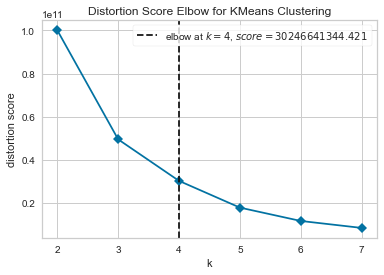

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [76]:
kmeans = KElbowVisualizer(c.KMeans(), k = clusters, timings = False)
kmeans.fit( X )
kmeans.show()

## <font color = 'green'> Silhouette Score (SS) </f>

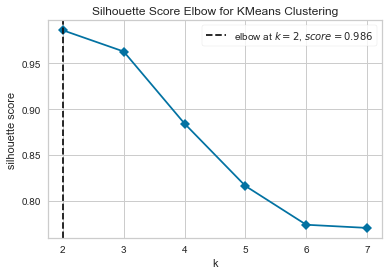

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [77]:
kmeans = KElbowVisualizer(c.KMeans(), k = clusters, metric = 'silhouette', timings = False)
kmeans.fit( X )
kmeans.show()

# <font color = 'green'> Training Model </f>

## <font color = 'green'> KMeans </f>

In [84]:
# model definition
k = 3

# model training
kmeans = c.KMeans(init='random',n_clusters=k, n_init=10, max_iter=300, random_state=42)
kmeans.fit( X )

# clustering
labels = kmeans.labels_

## <font color = 'green'> Cluster Validation </f>

In [85]:
## WSS (Within Clusters Sum of Square)
print('WSS value: {}'.format(kmeans.inertia_))

## SS (Silhouette Score)

print('SS: {}'.format(m.silhouette_score(X,labels=labels, metric='euclidean')))

WSS value: 52830442008.00695
SS: 0.9494677566681542


# <font color = 'green'> Cluster Analysis </f>

In [86]:
df9 = df6.copy()
df9['cluster'] = labels
df9.head()

,customer_id,gross_revenue,recency_days,invoice_no,cluster
0,17850,5288.63,302,35,0
1,13047,3079.10,31,18,0
2,12583,7187.34,2,18,0
3,13748,948.25,95,5,0
4,15100,635.10,330,6,0


## <font color = 'green'> Visual Inspection </f>

In [88]:
fig = px.scatter_3d(df9,x='recency_days',y='invoice_no',z='gross_revenue',color='cluster')
fig.show()

## <font color = 'green'> Cluster Profile </f>

In [89]:
df9.head()

,customer_id,gross_revenue,recency_days,invoice_no,cluster
0,17850,5288.63,302,35,0
1,13047,3079.10,31,18,0
2,12583,7187.34,2,18,0
3,13748,948.25,95,5,0
4,15100,635.10,330,6,0


In [90]:
# Number of customer
df_cluster = df9[['customer_id','cluster']].groupby('cluster').count().reset_index()
df_cluster['perc_customer'] = 100*(df_cluster['customer_id'] / df_cluster['customer_id'].sum())

# Averege Gross Revenue
df_avg_gross_revenue = df9[['gross_revenue','cluster']].groupby('cluster').mean().reset_index()
df_avg_gross_revenue['perc_gross'] = 100*(df_avg_gross_revenue['gross_revenue']/df_avg_gross_revenue['gross_revenue'].sum())
df_cluster = pd.merge(df_cluster,df_avg_gross_revenue,how='left',on='cluster')

# Average Recency Days
df_avg_recency_days = df9[['recency_days','cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster,df_avg_recency_days,how='left',on='cluster')

# Averege Invoices
df_avg_invoices = df9[['invoice_no','cluster']].groupby('cluster').mean().reset_index()
df_avg_invoices['perc_invoices'] = 100*(df_avg_invoices['invoice_no']/df_avg_invoices['invoice_no'].sum())
df_cluster = pd.merge(df_cluster,df_avg_invoices,how='left',on='cluster')

In [91]:
df_cluster

,cluster,customer_id,perc_customer,gross_revenue,perc_gross,recency_days,invoice_no,perc_invoices
0,0,4335,99.153705,1372.577826,0.612490,92.257901,4.614533,3.141171
1,1,6,0.137237,182181.981667,81.295647,7.166667,89.000000,60.583430
2,2,31,0.709058,40543.517742,18.091863,13.290323,53.290323,36.275399


### Cluster 01: Candidato à Insider 
    - Número de Customers: 6 (0.14% da base)
    - Recência média: 7 dias
    - Compras em média: 89 compras
    - Receita em média: R$ 182.182,00 dolares
    
    
### Cluster 02:
    - Número de Customers: 31 (0.71% da base)
    - Recência média: 13 dias
    - Compras em média: 18 compras
    - Receita em média: R$ 40.543,00 dolares
    
### Cluster 00: 
    - Número de Customers: 4335 (99.15% da base)
    - Recência média: 92 dias
    - Compras em média: 5 compras
    - Receita em média: R$ 1.372,00 dolares

# Deploy to Production

# Sand Box

## <font color = 'b'> 11.1. Original Dataset </f>

In [239]:
from sklearn import cluster as c

from sklearn.datasets import make_blobs
from yellowbrick.cluster import SilhouetteVisualizer, KElbowVisualizer
from matplotlib import pyplot as plt

C:\Users\Notebook\anaconda3\envs\insiders-clustering-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



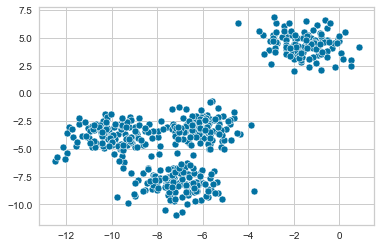

In [240]:
X, y= make_blobs(n_samples=500,
                 centers = 4,
                 cluster_std=1,
                 center_box = [-10,10],
                 shuffle=True,
                 random_state=1)

sns.scatterplot(X[:,0],X[:,1]);

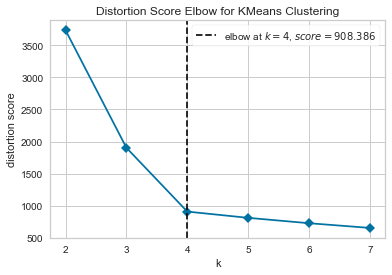

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [241]:
kmeans = KElbowVisualizer(c.KMeans(), k = clusters, timings = False)
kmeans.fit( X )
kmeans.show()

## <font color = 'b'> 11.2. Silhoutte Analysis </f>

IndexError: index 2 is out of bounds for axis 0 with size 2

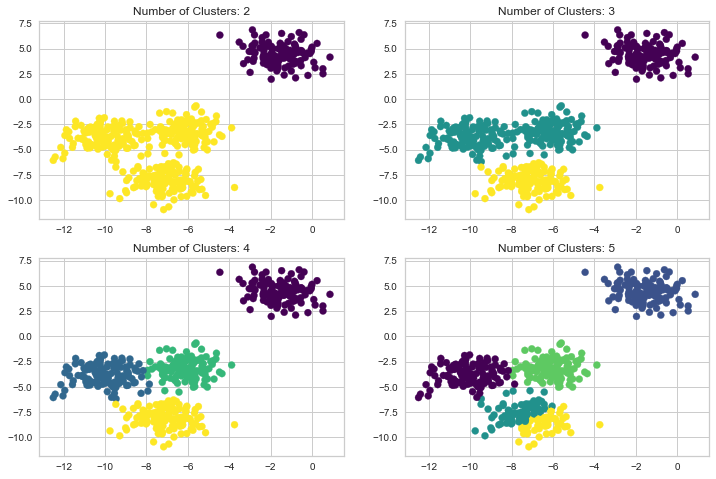

In [242]:
fig, ax = plt.subplots(2, 2, figsize=(12,8))
for i in clusters:
    kmeans = c.KMeans(n_clusters=i, init='k-means++',n_init=10,max_iter=300, random_state=42)
    kmeans.fit(X)
    
    q, mod = divmod(i,2)
    ax[q-1,mod].scatter(X[:,0],X[:,1],c=kmeans.labels_,cmap='viridis')
    ax[q-1,mod].set_title('Number of Clusters: {}'.format(i))

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(12,8))
for i in clusters:
    kmeans = c.KMeans(n_clusters=i, init='k-means++',n_init=10,max_iter=300, random_state=42)
    
    q, mod = divmod(i,2)
    
    visualizer = SilhouetteVisualizer(kmeans,colors='yellowbrick',ax=ax[q-1,mod])
    visualizer.fit(X)
    visualizer.finalize()
    plt.tight_layout()